### Business context

Banking Client is looking to expand its product portfolio adoption amongst existing consumer based. They have consumer who have subscribed to services like credit card, mortgages, insurances and now they want to increase the sales of personal insurance product.

### Objective

Key ask is to use this data and arrive at a list of consumers who are more inclined to purchase insurance policy and also which policies should be positioned to ensure a higher conversion rate

##### Importing the libraries

In [652]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

##### Display maximum columns

In [2]:
pd.options.display.max_columns = 500

##### Read the dataset

In [446]:
df = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\New folder\Dataset - Mortgage Insurance Cross Sell.csv')
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan Type,Customer Segment,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau Data - Monthly_Other_Co_Repayments,Worst_History_CT,Payment_Method,Age,Total # Public Info. (Court + bankruptcies),Total value Public Info. (Court + bankruptcies),Time since most recent Public Info. mnths,Total Value in Dispute if any,Worst status L6m,Worst C0rrent Stat0s,# of status=3's L6m,Searches - Total # L6m,Years on ER for SP,Bankruptcy Detected (SP),Total # outstanding Court's,Total outstanding balance (excl. mortgages),Total # of accounts,Any Frauds Detected,Time since most recent outstanding Court,Insurance_Description,Insurance_Product_Code,PPI
0,1,918,A,36,3000.0,14.4,UnSecured,46,132,H,Y,0,M,M,288.0,S,F,P,6,True,False,False,False,False,True,True,168.0,178000,"47,679.00",64406,513,5,D,46,1,5,16,NaN,0,0,0,9.0,10.0,N,1,18,6,N,16,NaN,NaN,0
1,2,978,X,60,6500.0,9.9,UnSecured,46,108,T,Y,0,M,M,204.0,P,F,P,6,True,False,True,False,False,True,False,132.0,0,-,46257,589,0,D,53,0,0,99,NaN,0,0,0,2.0,7.0,N,0,463,5,N,99,Joint,716.0,1
2,3,903,A,120,21000.0,7.9,secured,16,288,H,Y,0,S,F,37.0,R,P,P,2,True,False,True,False,False,True,False,300.0,180000,"11,563.00",31614,331,5,D,59,0,0,99,NaN,1,0,0,6.0,22.0,N,0,203,8,N,99,Life & Critical Illn,748.0,1
3,4,1060,X,78,7200.0,7.9,secured,17,276,H,Y,0,M,M,154.0,P,F,P,5,True,False,True,False,False,True,False,369.0,199000,"17,563.00",26045,413,0,D,56,2,30,50,266.0,0,0,0,1.0,21.0,N,1,87,7,N,50,Joint,719.0,1
4,5,1032,X,60,7500.0,7.9,UnSecured,46,66,H,Y,0,M,F,132.0,H,F,P,6,True,False,True,False,False,True,False,240.0,200000,"80,000.00",102048,1105,0,D,45,0,0,99,NaN,0,0,0,2.0,3.0,N,0,178,9,N,99,NaN,NaN,0


In [420]:
print("Total no. of columns: ", df.shape[1])
print("Total no. of observations: ", df.shape[0])

Total no. of columns:  52
Total no. of observations:  2500


In [ ]:
df.dtypes

##### List of numerical variables

In [422]:
Numerical = df.dtypes[df.dtypes != "object"].index
print("Total numerical variables: ",len(Numerical))

Total numerical variables:  36


In [423]:
df[Numerical].describe()

,Ref,Credit_Score,Term,Net_Advance,APR,Customer Segment,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Total_Outstanding_Balances,Bureau Data - Monthly_Other_Co_Repayments,Worst_History_CT,Age,Total # Public Info. (Court + bankruptcies),Total value Public Info. (Court + bankruptcies),Time since most recent Public Info. mnths,Total Value in Dispute if any,# of status=3's L6m,Searches - Total # L6m,Years on ER for SP,Total # outstanding Court's,Total outstanding balance (excl. mortgages),Total # of accounts,Time since most recent outstanding Court,Insurance_Product_Code,PPI
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2495.000000,2500.000000,2491.000000,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,832.000000,2500.000000,2170.000000,1992.000000,2500.00000,2500.000000,2500.000000,2500.000000,1551.000000,2500.000000
mean,1250.50000,886.351600,60.400800,7569.153396,17.874200,30.432400,125.062400,0.72280,110.312625,4.461200,203.924127,1.384299e+05,7.694505e+04,592.243600,2.480800,44.750000,0.207200,4.355200,90.345200,49.644231,0.342000,3.285714,8.750502,0.15760,138.015600,6.081200,92.024400,722.291425,0.620400
std,721.83216,95.434375,26.222784,6674.890921,9.803126,16.497706,113.162588,1.05906,97.985434,1.588176,109.718539,1.410500e+05,8.467378e+04,583.973148,2.391301,11.207682,0.649644,38.927913,23.617679,95.755999,1.260822,2.233784,7.567908,0.57419,142.955463,2.574735,21.908715,14.090680,0.485384
min,1.00000,413.000000,12.000000,500.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,672.000000,0.000000
25%,625.75000,823.000000,48.000000,3176.395000,8.900000,17.000000,39.000000,0.00000,42.000000,3.000000,120.000000,6.675000e+04,1.038875e+04,126.000000,0.000000,36.000000,0.000000,0.000000,99.000000,5.000000,0.000000,2.000000,3.000000,0.00000,37.000000,4.000000,99.000000,715.000000,0.000000
50%,1250.50000,889.000000,60.000000,6000.000000,15.900000,28.000000,90.000000,0.00000,78.000000,5.000000,192.000000,1.250000e+05,5.839950e+04,492.500000,4.000000,44.000000,0.000000,0.000000,99.000000,17.000000,0.000000,3.000000,6.000000,0.00000,94.000000,6.000000,99.000000,715.000000,1.000000
75%,1875.25000,953.000000,60.000000,9000.000000,23.900000,44.000000,183.000000,1.00000,151.500000,6.000000,273.000000,1.880000e+05,1.143430e+05,850.250000,5.000000,52.000000,0.000000,0.000000,99.000000,54.000000,0.000000,4.000000,13.000000,0.00000,194.000000,9.000000,99.000000,719.000000,1.000000
max,2500.00000,1298.000000,300.000000,52000.000000,44.900000,99.000000,840.000000,8.00000,580.000000,6.000000,610.000000,2.700000e+06,1.255925e+06,5848.000000,6.000000,74.000000,7.000000,999.000000,99.000000,999.000000,9.000000,9.000000,34.000000,7.00000,999.000000,9.000000,99.000000,775.000000,1.000000


In [424]:
df.shape

(2500, 52)

##### List of categorical variables

In [425]:
Categorical = df.dtypes[df.dtypes =="object"].index
print("Total categorical variables: ",len(Categorical))

Total categorical variables:  16


In [426]:
print(Categorical)

Index(['Final_Grade', 'Loan Type', 'Residential_Status', 'Telephone_Indicator',
       'Marital_Status', 'Gender', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind',
       ' Outstanding_Mortgage_Bal ', 'Payment_Method', 'Worst status L6m',
       'Worst C0rrent Stat0s', 'Bankruptcy Detected (SP)',
       'Any Frauds Detected', 'Insurance_Description'],
      dtype='object')


In [427]:
df[Categorical].describe()

,Final_Grade,Loan Type,Residential_Status,Telephone_Indicator,Marital_Status,Gender,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Outstanding_Mortgage_Bal,Payment_Method,Worst status L6m,Worst C0rrent Stat0s,Bankruptcy Detected (SP),Any Frauds Detected,Insurance_Description
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,1562
unique,10,2,4,2,4,2,8,2,2,1391,3,8,8,2,2,18
top,X,UnSecured,H,Y,M,M,P,F,P,-,D,0,0,N,N,Single
freq,708,2022,1940,2350,1454,1518,1488,2489,2494,751,2485,1350,1861,2497,2497,673


In [ ]:
df['Final_Grade'].value_counts()

In [ ]:
df[['Ref',' Outstanding_Mortgage_Bal ']].head(10)

In [ ]:
df[['Ref','Insurance_Description']].head(10)

##### Converting categorical variables to numeric

In [447]:
df[' Outstanding_Mortgage_Bal '] = df[' Outstanding_Mortgage_Bal '].str.replace(',', '')
df[' Outstanding_Mortgage_Bal '] = df[' Outstanding_Mortgage_Bal '].str.replace('-', '')

df[' Outstanding_Mortgage_Bal '] = df[' Outstanding_Mortgage_Bal '].apply(pd.to_numeric, errors='coerce')
df[['Ref',' Outstanding_Mortgage_Bal ']].head(10)

,Ref,Outstanding_Mortgage_Bal
0,1,47679.0
1,2,NaN
2,3,11563.0
3,4,17563.0
4,5,80000.0
5,6,NaN
6,7,60101.0
7,8,166543.0
8,9,78823.0
9,10,73386.0


In [ ]:
print(df[' Outstanding_Mortgage_Bal '].dtype)

##### Removing white spaces (leading and trailing in the data columns)

In [449]:
df.columns = df.columns.str.strip()

In [ ]:
df.dtypes

##### Proportion of PPI in the dataset

In [450]:
df['PPI'].value_counts()

total_len = len(df['PPI'])
percentage_lables = (df['PPI'].value_counts()/total_len)*100
print(percentage_lables)

1    62.04
0    37.96
Name: PPI, dtype: float64


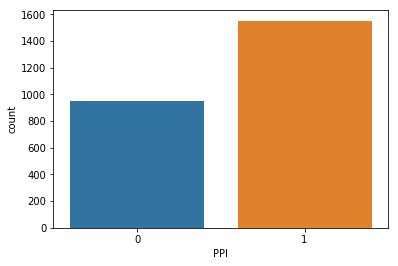

In [451]:
sns.countplot(x='PPI',data=df)
plt.show()

##### Identification of missing values

In [452]:
missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [453]:
missing_df.head(8)

Total Value in Dispute if any    66.72
Insurance_Product_Code           37.96
Insurance_Description            37.52
Outstanding_Mortgage_Bal         30.04
Years on ER for SP               20.32
Searches - Total # L6m           13.20
Time_with_Bank                    0.36
Time_in_Employment                0.20
dtype: float64

##### Removal of columns with mssing percentage > 35% (Intuitive)

Few variables are removed as below

In [515]:
df_m = df.drop(['Total Value in Dispute if any','Insurance_Product_Code','Insurance_Description','Years on ER for SP',
                 'Searches - Total # L6m','Ref'],axis = 1)
# ' Outstanding_Mortgage_Bal '

##### Filling missing values with 0

In [516]:
df_m = df_m.fillna(0)

In [ ]:
df_m.columns

In [517]:
print("The number of columns before missing value treatment: ",df.shape[1])
print("\nThe number of columns after missing value treatment: ",df_m.shape[1])

The number of columns before missing value treatment:  52

The number of columns after missing value treatment:  46


In [518]:
missing_df = (df_m.isnull().sum()/df_m.isnull().count()*100).sort_values(ascending=False)
missing_df.head()

PPI                0.0
Marital_Status     0.0
VISA_Card          0.0
ACCESS_Card        0.0
Current_Account    0.0
dtype: float64

##### Outlier detection - Graphically

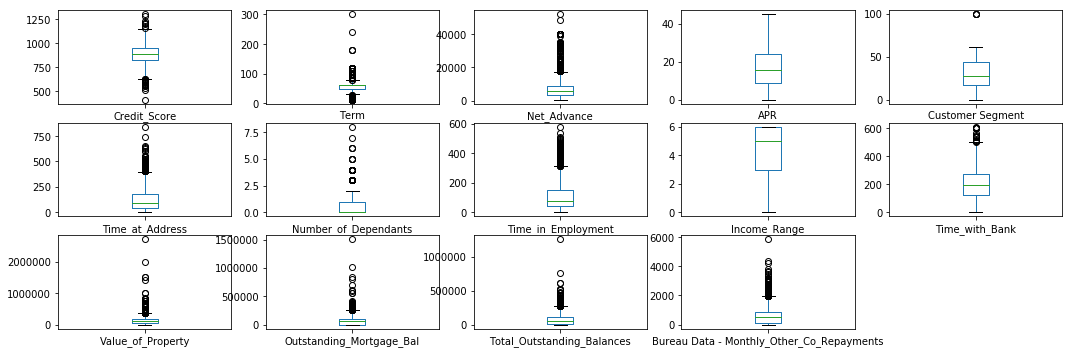

In [748]:
import matplotlib.pyplot as plt
df_m.iloc[:,0:30].plot(kind='box',layout = (5,5),subplots=True,sharex=False,figsize=(18,10))
plt.savefig(r'C:\Users\athiq.ahmed\Desktop\New folder\outlier_1.png')
plt.show()

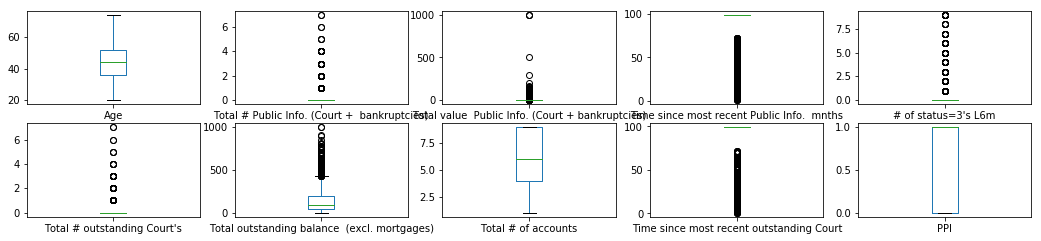

In [749]:
import matplotlib.pyplot as plt
df_m.iloc[:,31:].plot(kind='box',layout = (5,5),subplots=True,sharex=False,figsize=(18,10))
plt.savefig(r'C:\Users\athiq.ahmed\Desktop\New folder\outlier_2.png')
plt.show()

In [ ]:
df_m.columns

##### Outlier detection - Quantitativly
 Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

In [522]:
from scipy import stats
import numpy as np

# df = df1
Q1 = df_m.quantile(0.25)
Q3 = df_m.quantile(0.75)
IQR = Q3 - Q1

print("The outlier percentage for Credit_Score is - " + "{:.2f}".format(((df_m.Credit_Score < (Q1.Credit_Score - 1.5 * IQR.Credit_Score)) | (df_m.Credit_Score > (Q3.Credit_Score + 1.5 * IQR.Credit_Score))).sum()/(df_m.Credit_Score.shape[0])*100))
print("The outlier percentage for Term is - " + "{:.2f}".format(((df_m.Term < (Q1.Term - 1.5 * IQR.Term)) | (df_m.Term > (Q3.Term + 1.5 * IQR.Term))).sum()/(df_m.Term.shape[0])*100))
print("The outlier percentage for Net_Advance is - " + "{:.2f}".format(((df_m.Net_Advance < (Q1.Net_Advance - 1.5 * IQR.Net_Advance)) | (df_m.Net_Advance > (Q3.Net_Advance + 1.5 * IQR.Net_Advance))).sum()/(df_m.Net_Advance.shape[0])*100))
print("The outlier percentage for Time_with_Bank is - " + "{:.2f}".format(((df_m.Time_with_Bank < (Q1.Time_with_Bank - 1.5 * IQR.Time_with_Bank)) | (df_m.Time_with_Bank > (Q3.Time_with_Bank + 1.5 * IQR.Time_with_Bank))).sum()/(df_m.Time_with_Bank.shape[0])*100))
print("The outlier percentage for Time_at_Address is - " + "{:.2f}".format(((df_m.Time_at_Address < (Q1.Time_at_Address - 1.5 * IQR.Time_at_Address)) | (df_m.Time_at_Address > (Q3.Time_at_Address + 1.5 * IQR.Time_at_Address))).sum()/(df_m.Time_at_Address.shape[0])*100))
print("The outlier percentage for Time_in_Employment is - " + "{:.2f}".format(((df_m.Time_in_Employment < (Q1.Time_in_Employment - 1.5 * IQR.Time_in_Employment)) | (df_m.Time_in_Employment > (Q3.Time_in_Employment + 1.5 * IQR.Time_in_Employment))).sum()/(df_m.Time_in_Employment.shape[0])*100))
print("The outlier percentage for Value_of_Property is - " + "{:.2f}".format(((df_m.Value_of_Property < (Q1.Value_of_Property - 1.5 * IQR.Value_of_Property)) | (df_m.Value_of_Property > (Q3.Value_of_Property + 1.5 * IQR.Value_of_Property))).sum()/(df_m.Value_of_Property.shape[0])*100))
print("The outlier percentage for Outstanding_Mortgage_Bal  is - " + "{:.2f}".format(((df_m.Outstanding_Mortgage_Bal < (Q1.Outstanding_Mortgage_Bal - 1.5 * IQR.Outstanding_Mortgage_Bal)) | (df_m.Outstanding_Mortgage_Bal > (Q3.Outstanding_Mortgage_Bal + 1.5 * IQR.Outstanding_Mortgage_Bal))).sum()/(df_m.Outstanding_Mortgage_Bal.shape[0])*100))
print("The outlier percentage for Total_Outstanding_Balances  is - " + "{:.2f}".format(((df_m.Total_Outstanding_Balances < (Q1.Total_Outstanding_Balances - 1.5 * IQR.Total_Outstanding_Balances)) | (df_m.Total_Outstanding_Balances > (Q3.Total_Outstanding_Balances + 1.5 * IQR.Total_Outstanding_Balances))).sum()/(df_m.Total_Outstanding_Balances.shape[0])*100))

The outlier percentage for Credit_Score is - 1.36
The outlier percentage for Term is - 21.28
The outlier percentage for Net_Advance is - 6.76
The outlier percentage for Time_with_Bank is - 0.76
The outlier percentage for Time_at_Address is - 2.88
The outlier percentage for Time_in_Employment is - 5.44
The outlier percentage for Value_of_Property is - 3.72
The outlier percentage for Outstanding_Mortgage_Bal  is - 2.40
The outlier percentage for Total_Outstanding_Balances  is - 2.96


##### Outlier removal

In [523]:
df_m_o = df_m.drop(['Term'],axis = 1)

In [524]:
q1 = df_m_o.quantile(0.25)
q3 = df_m_o.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df_m_o = df_m_o[(df_m_o["Net_Advance"] < fence_high.Net_Advance) & (df_m_o["Net_Advance"] > fence_low.Net_Advance)]
df_m_o = df_m_o[(df_m_o["Time_in_Employment"] < fence_high.Time_in_Employment) & (df_m_o["Time_in_Employment"] > fence_low.Time_in_Employment)]

In [34]:
# fence_high

In [525]:
print("The outlier percentage for Net_Advance  is - " + "{:.2f}".format(((df_m_o.Net_Advance  < (Q1.Net_Advance  - 1.5 * IQR.Net_Advance )) | (df_m_o.Net_Advance  > (Q3.Net_Advance  + 1.5 * IQR.Net_Advance ))).sum()/(df_m_o.Net_Advance .shape[0])*100))
print("The outlier percentage for Time_in_Employment is - " + "{:.2f}".format(((df_m_o.Time_in_Employment  < (Q1.Time_in_Employment  - 1.5 * IQR.Time_in_Employment )) | (df_m_o.Time_in_Employment  > (Q3.Time_in_Employment  + 1.5 * IQR.Time_in_Employment ))).sum()/(df_m_o.Time_in_Employment .shape[0])*100))

The outlier percentage for Net_Advance  is - 0.00
The outlier percentage for Time_in_Employment is - 0.00


##### To see the distributions of the continous variables

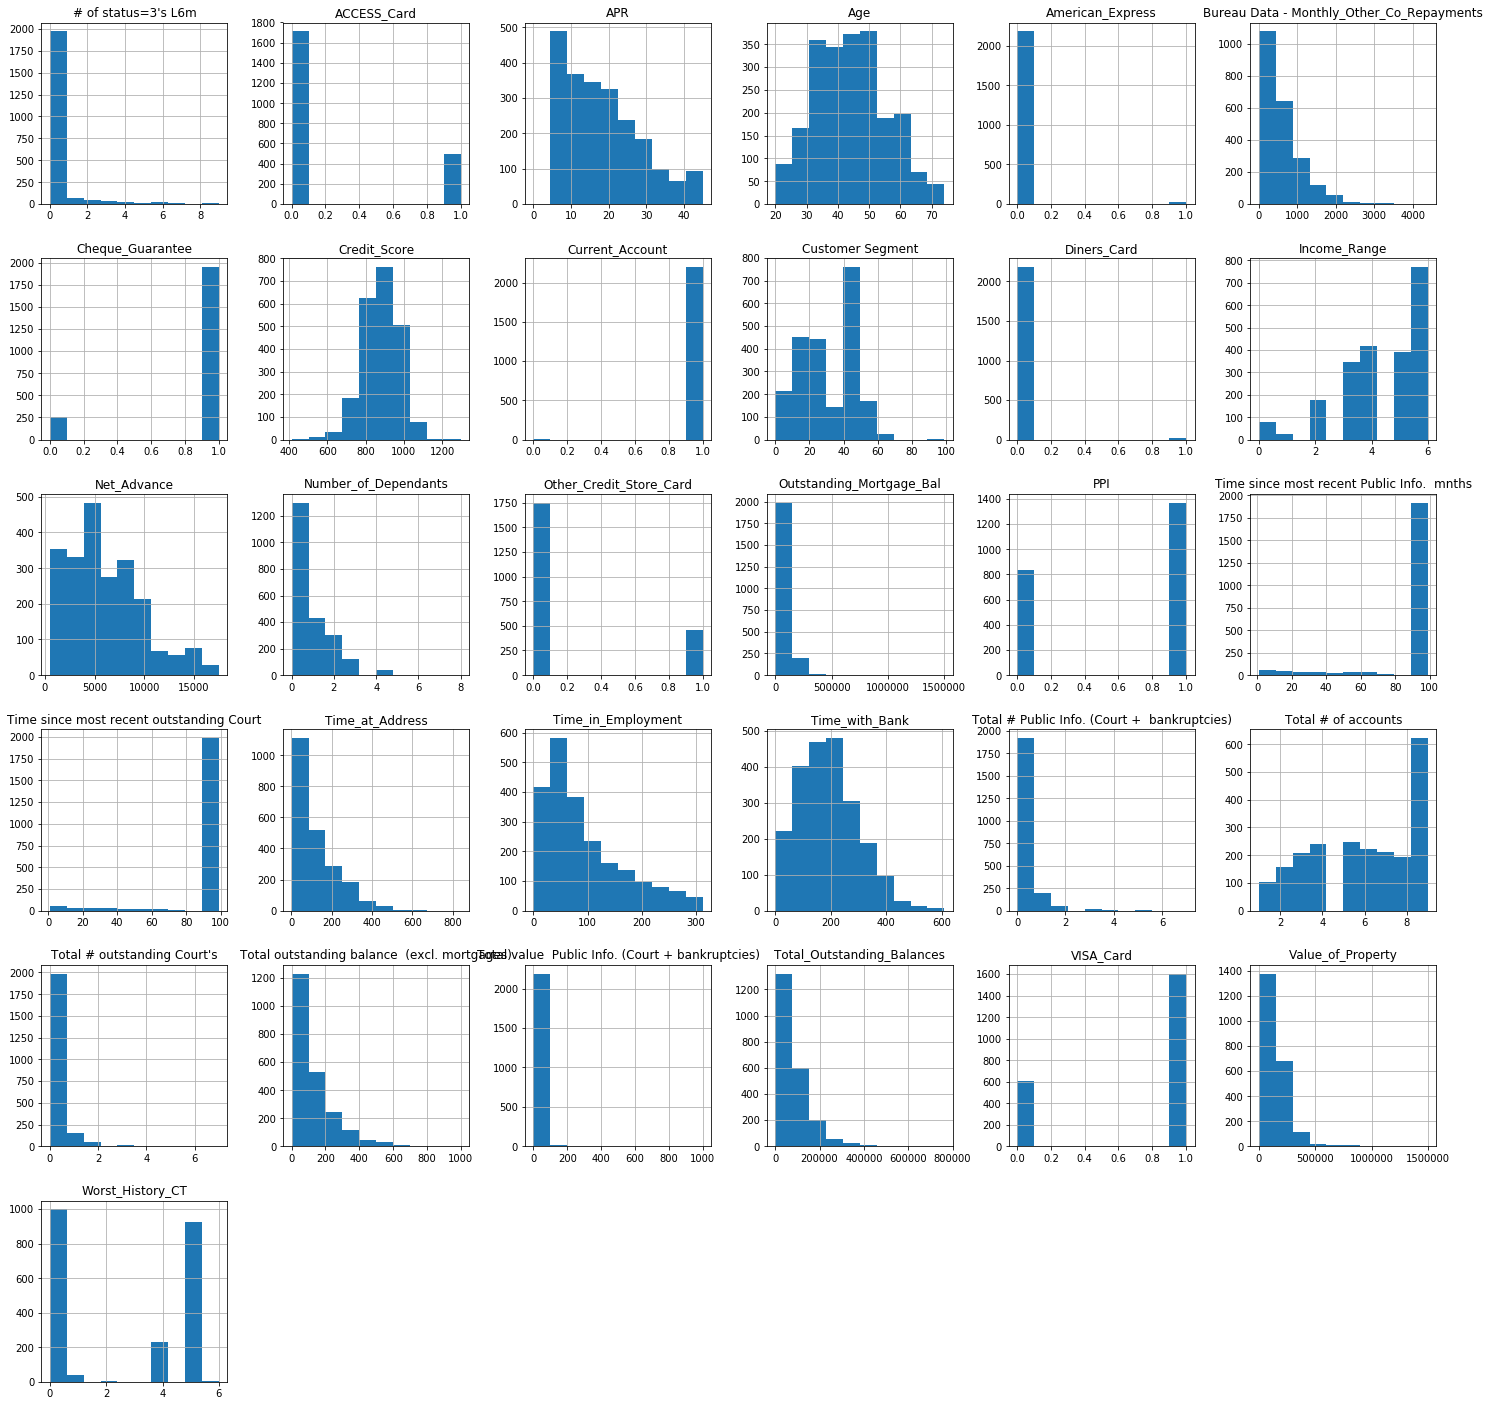

In [526]:
import matplotlib.pyplot as plt
df_m_o.iloc[:,0:].hist(figsize=(25,25))
plt.savefig(r'C:\Users\athiq.ahmed\Desktop\New folder\Data_distribution.png')
plt.show()

In [ ]:
df_m_o.columns

In [ ]:
df_m_o.dtypes

##### Density plot of Age for PPI subscription

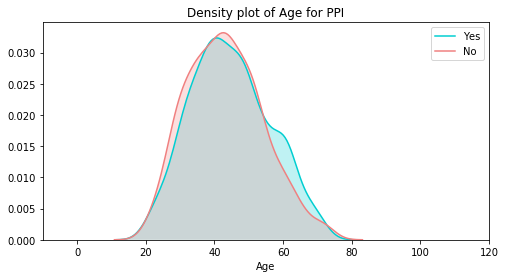

In [529]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Age"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Age"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Age for PPI')
ax.set(xlabel='Age')
plt.xlim(-10,120)
plt.show()

# The age distribution for PPI - subscribers and PPI - not subscribers is actually very similar. 

##### Density plot of APR for PPI subscription

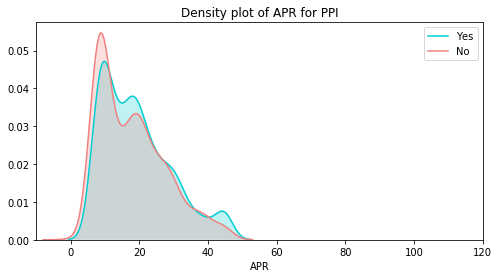

In [530]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["APR"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df1["APR"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of APR for PPI')
ax.set(xlabel='APR')
plt.xlim(-10,120)
plt.show()

# The APR (Annual percentage rate) distribution for PPI - subscribers and PPI - not subscribers is actually very similar. 
# One notable difference is that, APR between 18-23 has better PPI likelihood as compared to others

##### Density plot of Credit score for PPI subscription

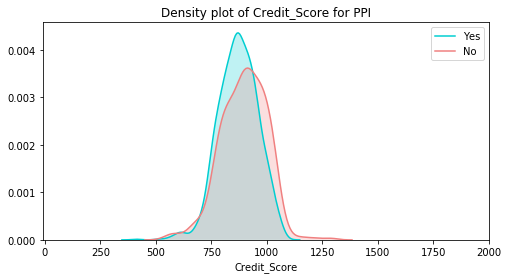

In [531]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Credit_Score"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Credit_Score"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Credit_Score for PPI')
ax.set(xlabel='Credit_Score')
plt.xlim(-10,2000)
plt.show()

# The Credit score distribution for PPI - subscribers and PPI - not subscribers is actually very similar. 

##### Density plot of Customer segment for PPI subscription

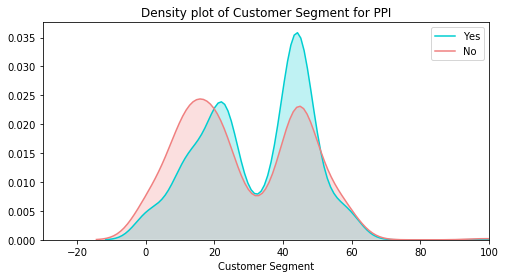

In [532]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Customer Segment"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Customer Segment"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Customer Segment for PPI')
ax.set(xlabel='Customer Segment')
plt.xlim(-30,100)
plt.show()

# The Customer segment distribution for PPI - subscribers and PPI - not subscribers is actually very similar. 
# One notable difference is that, customer segments around 40-60 tend to be more likelihood for PPI - subscribtion

##### Density plot of Income range for PPI subscription

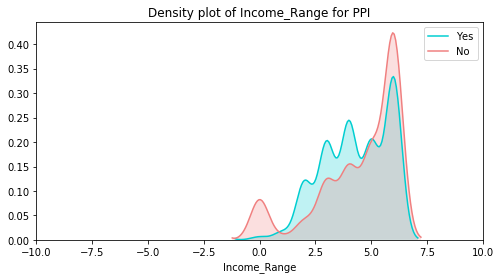

In [533]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Income_Range"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Income_Range"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Income_Range for PPI')
ax.set(xlabel='Income_Range')
plt.xlim(-10,10)
plt.show()

# The Income range distribution for PPI - subscribers and PPI - not subscribers is actually not very similar. 
# One notable difference is that, people though income range with scale 5 and above tend to be less likely to be PPI subscribers 

##### Density plot of Time since most recent Public Info.  mnths for PPI subscription

In [534]:
df_m_o.groupby('PPI')['Time since most recent Public Info.  mnths'].count()

PPI
0     837
1    1370
Name: Time since most recent Public Info.  mnths, dtype: int64

In [ ]:
df_m_o.groupby('Time since most recent Public Info.  mnths')['PPI'].count()

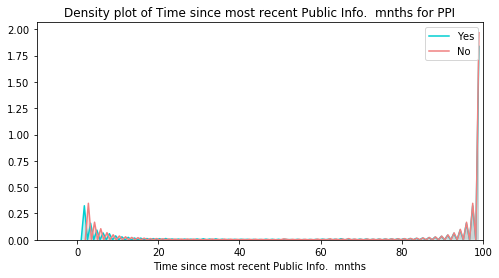

In [535]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Time since most recent Public Info.  mnths"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Time since most recent Public Info.  mnths"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Time since most recent Public Info.  mnths for PPI')
ax.set(xlabel='Time since most recent Public Info.  mnths')
plt.xlim(-10,100)
plt.show()

# This distribution for PPI - subscribers and PPI - not subscribers is actually very similar. 

##### Density plot of Total_Outstanding_Balances for PPI subscription

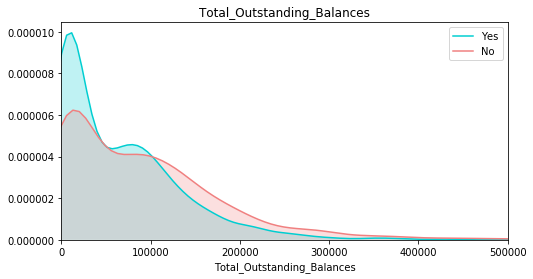

In [536]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(df_m_o["Total_Outstanding_Balances"][df_m_o.PPI == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_m_o["Total_Outstanding_Balances"][df_m_o.PPI == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Total_Outstanding_Balances')
ax.set(xlabel='Total_Outstanding_Balances')
plt.xlim(-100,500000)
plt.show()

# This distribution for subscribers and not subscribers is actually not very similar. 
# One notable difference is that, people with low outstanding balances tend to be PPI - subscribers 

In [537]:
Numerical = df_m_o.dtypes[df.dtypes != "object"].index
print("Total Numerical variables: ",len(Numerical))

Total Numerical variables:  31


In [538]:
Categorical = df_m_o.dtypes[df.dtypes == "object"].index
print("Total Categorical variables: ",len(Categorical))

Total Categorical variables:  14


In [539]:
print(Numerical)

Index(['Credit_Score', 'Net_Advance', 'APR', 'Customer Segment',
       'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment',
       'Income_Range', 'Current_Account', 'ACCESS_Card', 'VISA_Card',
       'American_Express', 'Diners_Card', 'Cheque_Guarantee',
       'Other_Credit_Store_Card', 'Time_with_Bank', 'Value_of_Property',
       'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances',
       'Bureau Data - Monthly_Other_Co_Repayments', 'Worst_History_CT', 'Age',
       'Total # Public Info. (Court +  bankruptcies)',
       'Total value  Public Info. (Court + bankruptcies)',
       'Time since most recent Public Info.  mnths', '# of status=3's L6m',
       'Total # outstanding Court's',
       'Total outstanding balance  (excl. mortgages)', 'Total # of accounts',
       'Time since most recent outstanding Court', 'PPI'],
      dtype='object')


In [540]:
print(Categorical)

Index(['Final_Grade', 'Loan Type', 'Residential_Status', 'Telephone_Indicator',
       'Marital_Status', 'Gender', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Payment_Method',
       'Worst status L6m', 'Worst C0rrent Stat0s', 'Bankruptcy Detected (SP)',
       'Any Frauds Detected'],
      dtype='object')


In [541]:
for column_name in Categorical:
    print(column_name,"-",len(df_m_o[column_name].unique()),"-",df_m_o[
        
        
        column_name].unique(),"\n")

Final_Grade - 10 - ['A ' 'X ' 'B ' 'C ' 'E ' 'D ' 'F ' 'S ' 'R ' 'O '] 

Loan Type - 2 - ['UnSecured' 'secured'] 

Residential_Status - 4 - ['H' 'T' 'R' 'L'] 

Telephone_Indicator - 2 - ['Y' 'N'] 

Marital_Status - 4 - ['M' 'S' 'D' 'W'] 

Gender - 2 - ['M' 'F'] 

Employment_Status - 8 - ['S' 'P' 'H' 'G' 'D' 'M' 'R' 'U'] 

Full_Part_Time_Empl_Ind - 2 - ['F' 'P'] 

Perm_Temp_Empl_Ind - 2 - ['P' 'T'] 

Payment_Method - 3 - ['D ' 'S ' 'C '] 

Worst status L6m - 8 - ['0' '1' '3' '2' 'N' '6' '4' '5'] 

Worst C0rrent Stat0s - 8 - ['0' '1' '3' '2' 'N' '6' '5' '4'] 

Bankruptcy Detected (SP) - 2 - ['N' 'Y'] 

Any Frauds Detected - 2 - ['N' 'Y'] 



In [ ]:
df_m_o.Final_Grade.value_counts()

In [ ]:
sns.countplot(x='Final_Grade',data=df_m_o)
plt.show()

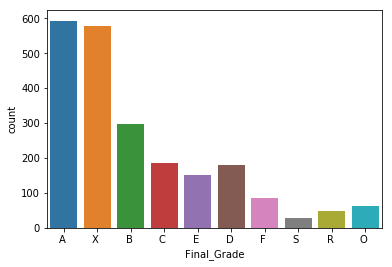

None


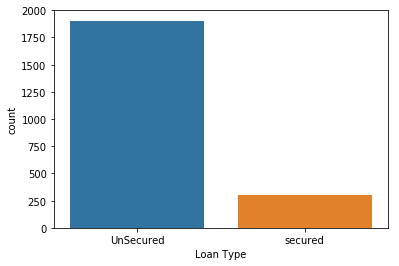

None


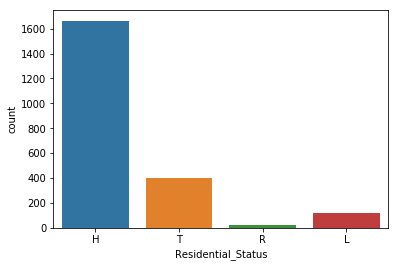

None


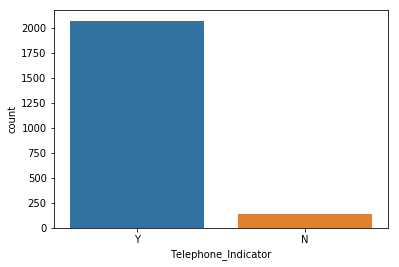

None


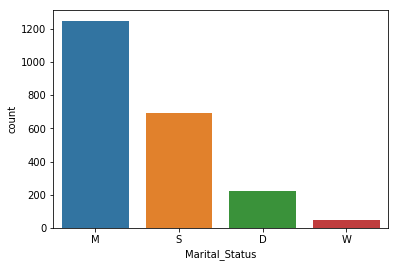

None


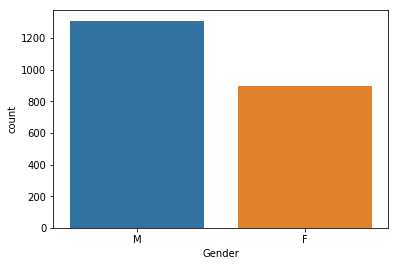

None


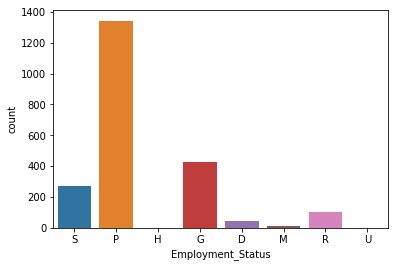

None


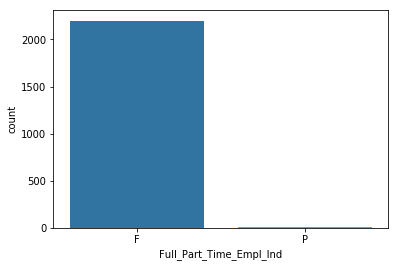

None


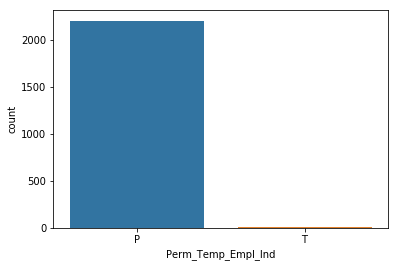

None


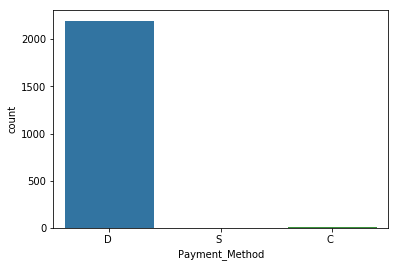

None


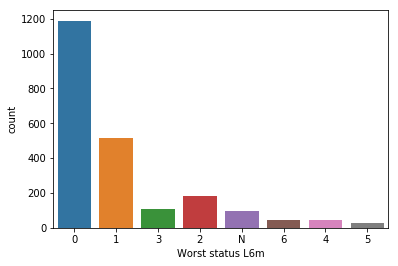

None


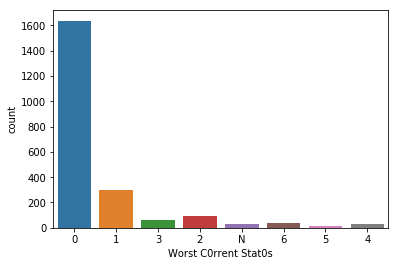

None


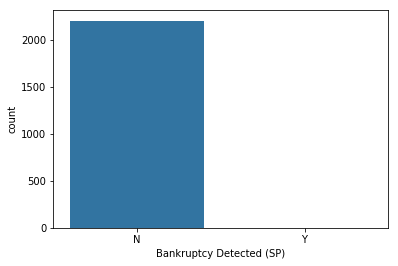

None


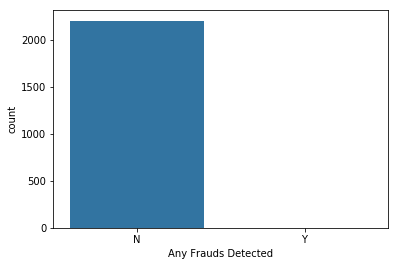

None


In [478]:
for column_name in Categorical:
    print(plt.show(sns.countplot(x=column_name,data=df_m_o)))

In [544]:
df_m_o_f = df_m_o.drop(['Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind','Payment_Method','Bankruptcy Detected (SP)'
                , 'Any Frauds Detected'],axis = 1)

In [576]:
Categorical = df_m_o_f.dtypes[df_m_o_f.dtypes == "object"].index
print("Total Categorical variables: ",len(Categorical))

Total Categorical variables:  9


In [546]:
print(Categorical)

Index(['Final_Grade', 'Loan Type', 'Residential_Status', 'Telephone_Indicator',
       'Marital_Status', 'Gender', 'Employment_Status', 'Worst status L6m',
       'Worst C0rrent Stat0s'],
      dtype='object')


##### Correlation matrix

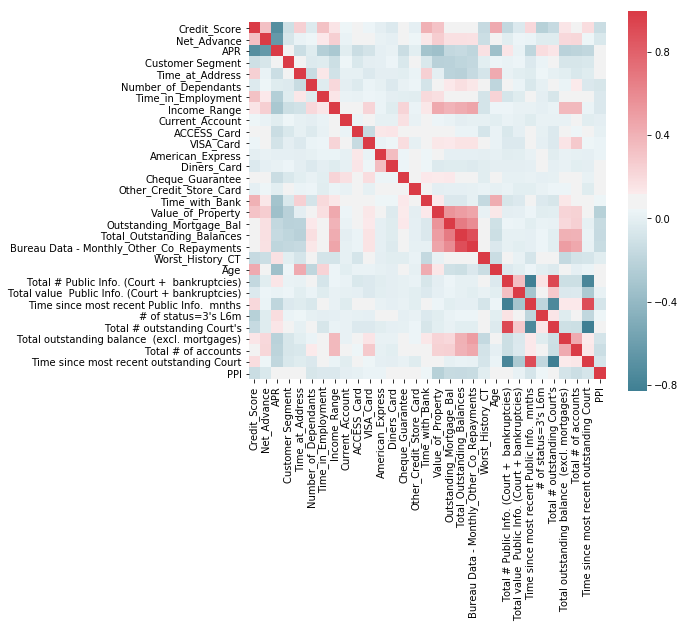

In [567]:
import seaborn as sns
plt.subplots(figsize=(8,7))
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,
            yticklabels=corr.columns.values)
plt.savefig(r'C:\Users\athiq.ahmed\Desktop\New folder\corr.png')
plt.show()

In [559]:
# Create correlation matrix
corr_matrix = df_m_o_f.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]


In [ ]:
corr_matrix

In [ ]:
upper

In [560]:
to_drop

['APR',
 'Bureau Data - Monthly_Other_Co_Repayments',
 'Time since most recent Public Info.  mnths',
 "Total # outstanding Court's",
 'Time since most recent outstanding Court']

In [561]:
# Drop features 
df_m_o_f_c = df_m_o_f.drop(['APR'
                            ,'Bureau Data - Monthly_Other_Co_Repayments'
                            ,'Time since most recent Public Info.  mnths'
                            , "Total # outstanding Court's"
                            , 'Time since most recent outstanding Court'], axis=1)

In [562]:
df_m_o_f_c.shape

(2207, 35)

In [564]:
Numerical = df_m_o_f_c.dtypes[df_m_o_f_c.dtypes != "object"].index
print("Total Numerical variables: ",len(Numerical))

Total Numerical variables:  26


In [575]:
Categorical = df_m_o_f_c.dtypes[df_m_o_f_c.dtypes == "object"].index
print("Total Categorical variables: ",len(Categorical))

Total Categorical variables:  9


In [565]:
print(Numerical)

Index(['Credit_Score', 'Net_Advance', 'Customer Segment', 'Time_at_Address',
       'Number_of_Dependants', 'Time_in_Employment', 'Income_Range',
       'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express',
       'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal',
       'Total_Outstanding_Balances', 'Worst_History_CT', 'Age',
       'Total # Public Info. (Court +  bankruptcies)',
       'Total value  Public Info. (Court + bankruptcies)',
       '# of status=3's L6m', 'Total outstanding balance  (excl. mortgages)',
       'Total # of accounts', 'PPI'],
      dtype='object')


In [566]:
print(Categorical)

Index(['Final_Grade', 'Loan Type', 'Residential_Status', 'Telephone_Indicator',
       'Marital_Status', 'Gender', 'Employment_Status', 'Worst status L6m',
       'Worst C0rrent Stat0s'],
      dtype='object')


##### Final columns

In [755]:
clmns = ['Loan Type','Marital_Status', 'Gender','Worst status L6m'
         ,'Credit_Score','Income_Range','Total_Outstanding_Balances','Age','Total # of accounts','PPI']

In [756]:
data_raw = df_m_o_f_c[clmns]

In [757]:
data_raw.shape

(2207, 10)

In [758]:
Numerical = data_raw.dtypes[data_raw.dtypes != "object"].index
print("Total Numerical variables: ",len(Numerical))

Total Numerical variables:  6


In [759]:
Categorical = data_raw.dtypes[data_raw.dtypes == "object"].index
print("Total Categorical variables: ",len(Categorical))

Total Categorical variables:  4


In [760]:
print(Categorical)

Index(['Loan Type', 'Marital_Status', 'Gender', 'Worst status L6m'], dtype='object')


##### Dummy variables creation

In [761]:
data_dummies = pd.get_dummies(data_raw,columns=['Loan Type', 'Marital_Status', 'Gender','Worst status L6m']
                      ,drop_first=True)
data_dummies.head()

,Credit_Score,Income_Range,Total_Outstanding_Balances,Age,Total # of accounts,PPI,Loan Type_secured,Marital_Status_M,Marital_Status_S,Marital_Status_W,Gender_M,Worst status L6m_1,Worst status L6m_2,Worst status L6m_3,Worst status L6m_4,Worst status L6m_5,Worst status L6m_6,Worst status L6m_N
0,918,6,64406,46,6,0,0,1,0,0,1,0,0,0,0,0,0,0
1,978,6,46257,53,5,1,0,1,0,0,1,0,0,0,0,0,0,0
3,1060,5,26045,56,7,1,1,1,0,0,1,0,0,0,0,0,0,0
4,1032,6,102048,45,9,0,0,1,0,0,0,0,0,0,0,0,0,0
5,839,6,181217,33,9,1,0,1,0,0,1,1,0,0,0,0,0,0


In [762]:
data_dummies.shape

(2207, 18)

##### Standardize clustering variables to have mean=0 and sd=1

In [763]:
data_std=data_dummies.copy()
data_std['Credit_Score']=preprocessing.scale(data_std['Credit_Score'].astype('float64'))
data_std['Income_Range']=preprocessing.scale(data_std['Income_Range'].astype('float64'))
data_std['Total_Outstanding_Balances']=preprocessing.scale(data_std['Total_Outstanding_Balances'].astype('float64'))
data_std['Age']=preprocessing.scale(data_std['Age'].astype('float64'))
data_std['Total # of accounts']=preprocessing.scale(data_std['Total # of accounts'].astype('float64'))
# data_std['Loan Type_secured']=preprocessing.scale(data_std['Loan Type_secured'].astype('float64'))
# data_std['Marital_Status_M']=preprocessing.scale(data_std['Marital_Status_M'].astype('float64'))
# data_std['Marital_Status_S']=preprocessing.scale(data_std['Marital_Status_S'].astype('float64'))
# data_std['Marital_Status_W']=preprocessing.scale(data_std['Marital_Status_W'].astype('float64'))
# data_std['Gender_M']=preprocessing.scale(data_std['Gender_M'].astype('float64'))
# data_std['Worst status L6m_1']=preprocessing.scale(data_std['Worst status L6m_1'].astype('float64'))
# data_std['Worst status L6m_2']=preprocessing.scale(data_std['Worst status L6m_2'].astype('float64'))
# data_std['Worst status L6m_3']=preprocessing.scale(data_std['Worst status L6m_3'].astype('float64'))
# data_std['Worst status L6m_4']=preprocessing.scale(data_std['Worst status L6m_4'].astype('float64'))
# data_std['Worst status L6m_5']=preprocessing.scale(data_std['Worst status L6m_5'].astype('float64'))
# data_std['Worst status L6m_6']=preprocessing.scale(data_std['Worst status L6m_6'].astype('float64'))
# data_std['Worst status L6m_N']=preprocessing.scale(data_std['Worst status L6m_N'].astype('float64'))

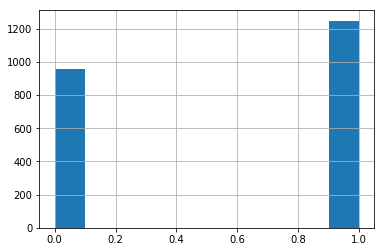

In [764]:
data_std.Marital_Status_M.hist()

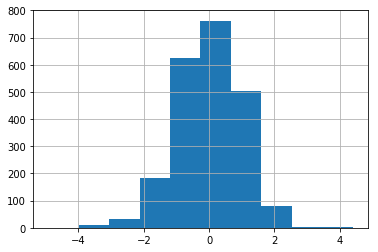

In [765]:
data_std.Credit_Score.hist()

In [734]:
data_std.head()

,Credit_Score,Income_Range,Total_Outstanding_Balances,Age,Total # of accounts,Loan Type_secured,Marital_Status_M,Marital_Status_S,Marital_Status_W,Gender_M,Worst status L6m_1,Worst status L6m_2,Worst status L6m_3,Worst status L6m_4,Worst status L6m_5,Worst status L6m_6,Worst status L6m_N
0,0.395273,1.006883,-0.107826,0.170496,0.005257,0,1,0,0,1,0,0,0,0,0,0,0
1,1.027363,1.006883,-0.338098,0.789677,-0.381512,0,1,0,0,1,0,0,0,0,0,0,0
3,1.891219,0.385291,-0.594545,1.055040,0.392027,1,1,0,0,1,0,0,0,0,0,0,0
4,1.596244,1.006883,0.369771,0.082042,1.165566,0,1,0,0,0,0,0,0,0,0,0,0
5,-0.436978,1.006883,1.374256,-0.979411,1.165566,0,1,0,0,1,1,0,0,0,0,0,0


##### Elbow graph analysis to determine #k clusters

Choosing SQRT(N / 2) clusters is a quick rule of thumb.  If you have 100 data points, you could start off with SQRT(100/2) = SQRT(50) = 7 clusters.

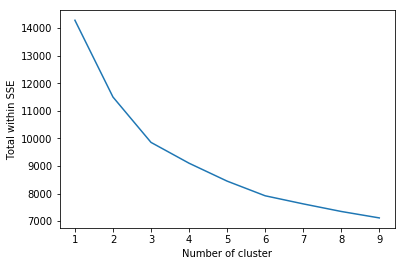

In [766]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_std)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Total within SSE")
plt.show()

##### Interpret the cluster solution

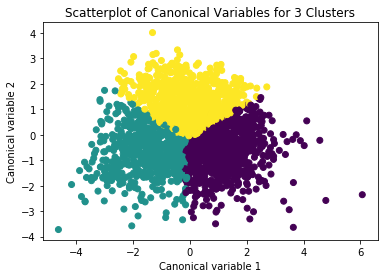

In [767]:
model3=KMeans(n_clusters=3)
model3.fit(data_std)
clusassign=model3.predict(data_std)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data_std)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

##### Cluster the data

In [768]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)
labels = kmeans.labels_

##### Cluster size

In [769]:
data_std.shape

(2207, 18)

In [770]:
counts = np.bincount(labels[labels>=0])
print (counts)

[763 626 818]


In [771]:
kmeans.inertia_  # #sum of distances of samples to their closest centroid

9853.712182914778

### Cluster's performance

##### Silhouette Coefficient

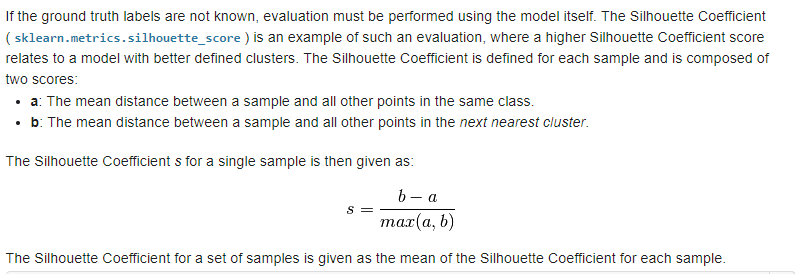

In [717]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Kmeans\Images\Silhouette coefficient.png'
      ,width="800")

Advantages
* The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

Disadvantages
* The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [772]:
from sklearn import metrics

metrics.silhouette_score(data_dummies, labels, metric='euclidean')

0.047597358411089995

##### Calinski-Harabaz Index

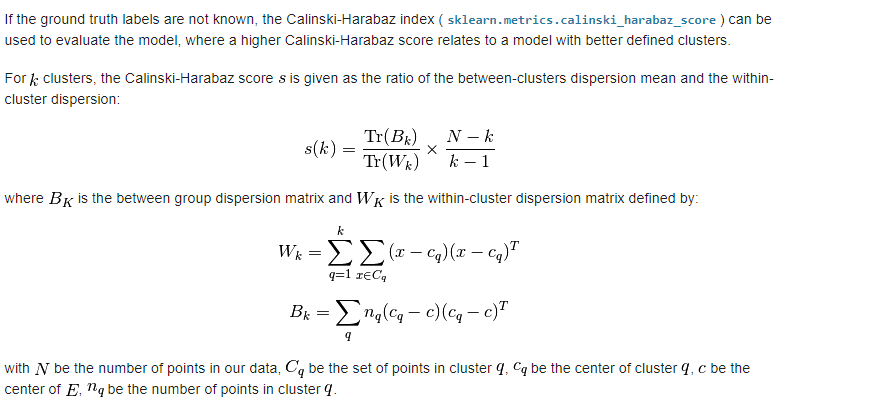

In [718]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Kmeans\Images\Calinski-Harabaz index.png'
      ,width="800")

Advantages
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
* The score is fast to compute

Disadvantages
* The Calinski-Harabaz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [773]:
metrics.calinski_harabaz_score(data_dummies, labels) 

853.9320321474629

##### Add back to original data

In [774]:
data_raw['clusters'] = labels

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [775]:
data_raw.head()

,Loan Type,Marital_Status,Gender,Worst status L6m,Credit_Score,Income_Range,Total_Outstanding_Balances,Age,Total # of accounts,PPI,clusters
0,UnSecured,M,M,0,918,6,64406,46,6,0,2
1,UnSecured,M,M,0,978,6,46257,53,5,1,0
3,secured,M,M,0,1060,5,26045,56,7,1,0
4,UnSecured,M,F,0,1032,6,102048,45,9,0,2
5,UnSecured,M,M,1,839,6,181217,33,9,1,2


##### Lets analyze the clusters

In [788]:
# print (data_raw.groupby(['clusters']).mean())
data_raw.groupby(['clusters']).mean()

,Credit_Score,Income_Range,Total_Outstanding_Balances,Age,Total # of accounts,PPI
clusters,,,,,,
0,946.483617,4.254260,35604.233290,54.124509,5.402359,0.653997
1,805.547923,3.100639,29779.321086,36.255591,4.314696,0.706070
2,876.256724,5.476773,140699.242054,40.678484,7.810513,0.524450


In [787]:
data_raw.groupby(['PPI','clusters']).count()

Loan Type  Marital_Status  Gender  Worst status L6m  \
PPI clusters                                                        
0   0               264             264     264               264   
    1               184             184     184               184   
    2               389             389     389               389   
1   0               499             499     499               499   
    1               442             442     442               442   
    2               429             429     429               429   

              Credit_Score  Income_Range  Total_Outstanding_Balances  Age  \
PPI clusters                                                                
0   0                  264           264                         264  264   
    1                  184           184                         184  184   
    2                  389           389                         389  389   
1   0                  499           499                         499  499   
    1                  442           442                         442  442   
    2                  429           429                         429  429   

              Total # of accounts  
PPI clusters                       
0   0                         264  
    1                         184  
    2                         389  
1   0                         499  
    1                         442  
    2                         429

In [789]:
data_raw.head()

,Loan Type,Marital_Status,Gender,Worst status L6m,Credit_Score,Income_Range,Total_Outstanding_Balances,Age,Total # of accounts,PPI,clusters
0,UnSecured,M,M,0,918,6,64406,46,6,0,2
1,UnSecured,M,M,0,978,6,46257,53,5,1,0
3,secured,M,M,0,1060,5,26045,56,7,1,0
4,UnSecured,M,F,0,1032,6,102048,45,9,0,2
5,UnSecured,M,M,1,839,6,181217,33,9,1,2
